# Normalize images

In [2]:
import os
import bigfish.stack as stack
import bigfish.plot as plot

In [3]:
input_directory = "/Users/arthur/big-fish/data/input"
output_directory = "/Users/arthur/big-fish/data/output"
os.listdir(input_directory)

['untitled folder',
 'dapi_1.tif',
 'smFISH_simulations__batch_0003.json.gz',
 'dapi_2.tif',
 '.DS_Store',
 'smFISH_simulations__batch_0002.json.gz',
 'smFISH_simulations__batch_0001.json.gz',
 'r03c03f01_405.tif',
 'untitled folder.zip',
 'cy3_1.tif',
 'cy3_2.tif',
 'r03c03f01_561.tif',
 'cellLibrary.json',
 'gfp_2.tif',
 'gfp_1.tif',
 'r03c03f01_488.tif']

## Rescale images

### Loading with recipe

In [8]:
recipe = {"fov": "r03c03f01", 
          "c": ["405", "488", "561"], 
          "ext": "tif",
          "pattern": "fov_c.ext"}
stack.check_recipe(recipe)

In [14]:
image = stack.build_stack(recipe, input_directory, input_dimension=3)
print(image.shape, image.dtype)
print("minimum value: {0} | maximum value: {1}".format(image.min(), image.max()))

(1, 3, 35, 2160, 2160) uint16
minimum value: 22 | maximum value: 54687


In [12]:
image_rescaled = stack.build_stack(recipe, input_directory, input_dimension=3, normalize=True)
print(image_rescaled.shape, image_rescaled.dtype)
print("minimum value: {0} | maximum value: {1}".format(image_rescaled.min(), image_rescaled.max()))

(1, 3, 35, 2160, 2160) uint16
minimum value: 0 | maximum value: 65535


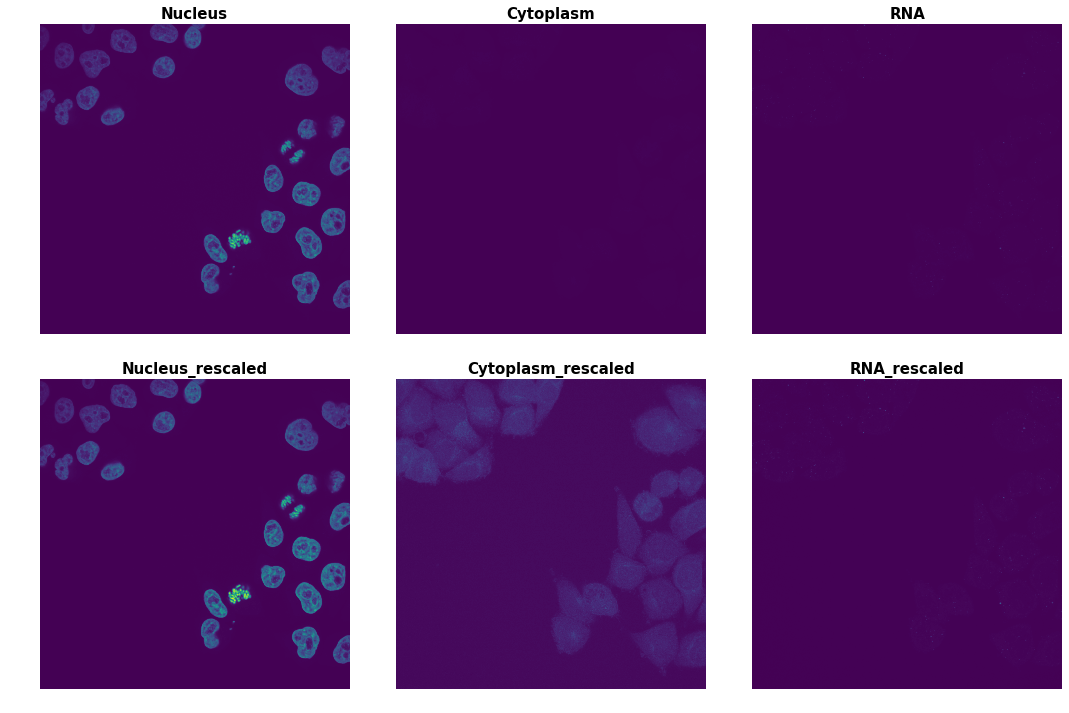

In [15]:
images = [image[0, 0, 17, :, :], image[0, 1, 17, :, :], image[0, 2, 17, :, :], 
          image_rescaled[0, 0, 17, :, :], image_rescaled[0, 1, 17, :, :], image_rescaled[0, 2, 17, :, :]]
titles = ["Nucleus", "Cytoplasm", "RNA", "Nucleus_rescaled", "Cytoplasm_rescaled", "RNA_rescaled"]
path_output = os.path.join(output_directory, "image_rescaled")
plot.plot_images(images, 
                 titles=titles, 
                 framesize=(15, 10), remove_frame=True,
                 path_output=path_output, ext="png")

### Loading with recipes

In [16]:
recipe_1 = {"fov": "r03c03f01", "c": ["405", "488", "561"], "ext": "tif", "pattern": "fov_c.ext"}
recipe_2 = {"fov": ["1", "2"], "c": ["dapi", "cy3", "gfp"], "ext": "tif", "pattern": "c_fov.ext"}
data_map = [(recipe_1, input_directory), (recipe_2, input_directory)]

In [17]:
image_generator = stack.build_stacks(data_map, input_dimension=3, normalize=True)
for image_rescaled in image_generator:
    print(image_rescaled.shape, image_rescaled.dtype)
    print("minimum value: {0} | maximum value: {1}".format(image_rescaled.min(), image_rescaled.max()))

(1, 3, 35, 2160, 2160) uint16
minimum value: 0 | maximum value: 65535
(1, 3, 34, 2048, 2048) uint16
minimum value: 0 | maximum value: 65535
(1, 3, 34, 2048, 2048) uint16
minimum value: 0 | maximum value: 65535


### Loading with paths

In [19]:
path_1 = os.path.join(input_directory, "r03c03f01_405.tif")
path_2 = os.path.join(input_directory, "r03c03f01_488.tif")
path_3 = os.path.join(input_directory, "r03c03f01_561.tif")
paths = [path_1, path_2, path_3]

In [20]:
image_rescaled = stack.build_stack_no_recipe(paths, input_dimension=3, normalize=True)
print(image_rescaled.shape, image_rescaled.dtype)
print("minimum value: {0} | maximum value: {1}".format(image_rescaled.min(), image_rescaled.max()))

(1, 3, 35, 2160, 2160) uint16
minimum value: 0 | maximum value: 65535


### With stack.rescale function

In [21]:
recipe = {"fov": "r03c03f01", 
          "c": ["405", "488", "561"], 
          "ext": "tif",
          "pattern": "fov_c.ext"}
stack.check_recipe(recipe)

In [22]:
image = stack.build_stack(recipe, input_directory, input_dimension=3)
print(image.shape, image.dtype)
print("minimum value: {0} | maximum value: {1}".format(image.min(), image.max()))

(1, 3, 35, 2160, 2160) uint16
minimum value: 22 | maximum value: 54687


In [23]:
image_rescaled = stack.rescale(image)
print(image_rescaled.shape, image_rescaled.dtype)
print("minimum value: {0} | maximum value: {1}".format(image_rescaled.min(), image_rescaled.max()))

(1, 3, 35, 2160, 2160) uint16
minimum value: 0 | maximum value: 65535


## Contrast images

### Loading with recipe

In [24]:
recipe = {"fov": "r03c03f01", 
          "c": ["405", "488", "561"], 
          "ext": "tif",
          "pattern": "fov_c.ext"}
stack.check_recipe(recipe)

In [25]:
image = stack.build_stack(recipe, input_directory, input_dimension=3)
print(image.shape, image.dtype)
print("minimum value: {0} | maximum value: {1}".format(image.min(), image.max()))

(1, 3, 35, 2160, 2160) uint16
minimum value: 22 | maximum value: 54687


In [26]:
image_rescaled = stack.build_stack(recipe, input_directory, input_dimension=3, normalize=True)
print(image_rescaled.shape, image_rescaled.dtype)
print("minimum value: {0} | maximum value: {1}".format(image_rescaled.min(), image_rescaled.max()))

(1, 3, 35, 2160, 2160) uint16
minimum value: 0 | maximum value: 65535


In [27]:
image_stretched = stack.build_stack(recipe, input_directory, input_dimension=3, normalize=True,
                                    channel_to_stretch=[0, 1, 2], stretching_percentile=99.9)
print(image_stretched.shape, image_stretched.dtype)
print("minimum value: {0} | maximum value: {1}".format(image_stretched.min(), image_stretched.max()))

(1, 3, 35, 2160, 2160) uint16
minimum value: 0 | maximum value: 65535


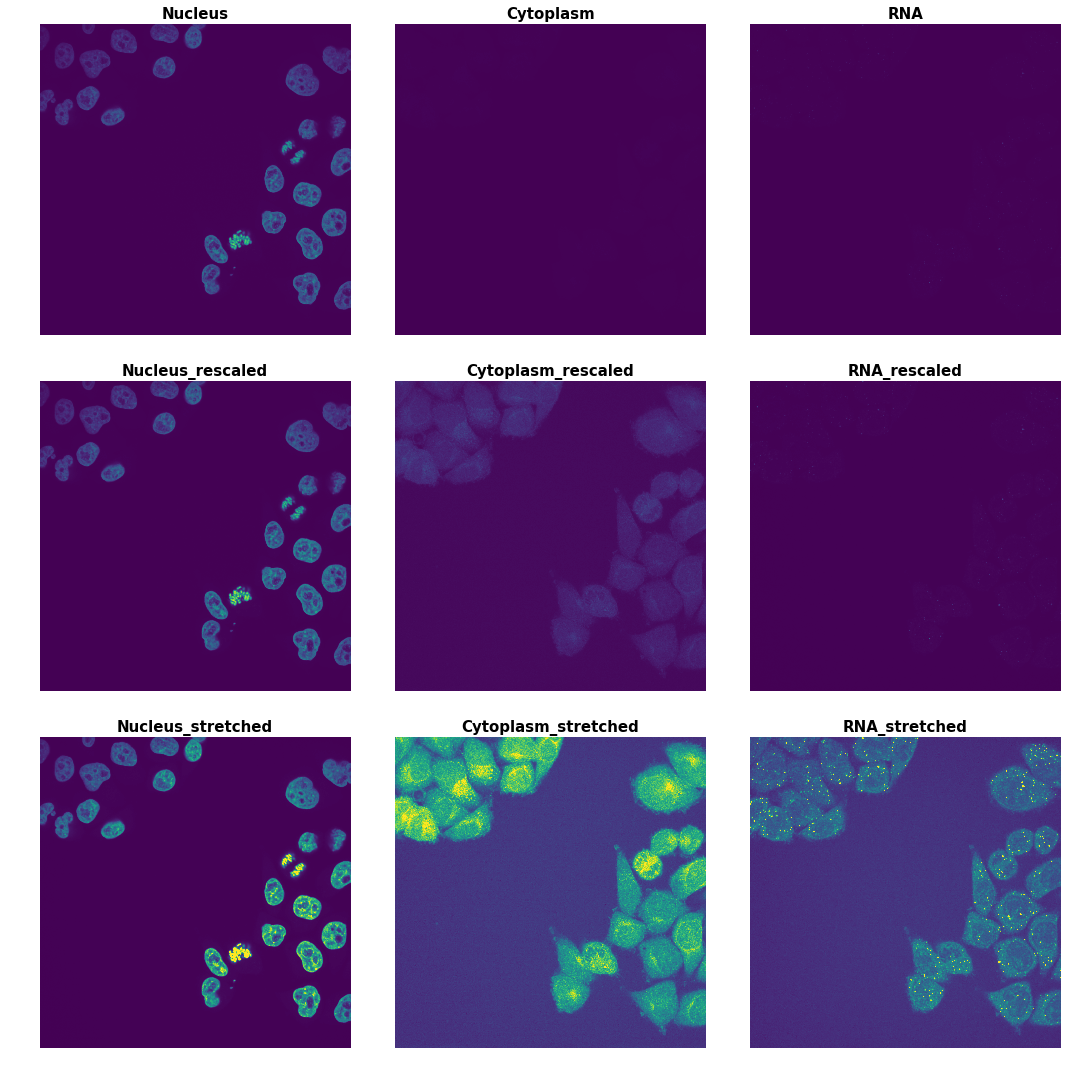

In [28]:
images = [image[0, 0, 17, :, :], image[0, 1, 17, :, :], image[0, 2, 17, :, :], 
          image_rescaled[0, 0, 17, :, :], image_rescaled[0, 1, 17, :, :], image_rescaled[0, 2, 17, :, :],
          image_stretched[0, 0, 17, :, :], image_stretched[0, 1, 17, :, :], image_stretched[0, 2, 17, :, :]]
titles = ["Nucleus", "Cytoplasm", "RNA", "Nucleus_rescaled", "Cytoplasm_rescaled", "RNA_rescaled",
          "Nucleus_stretched", "Cytoplasm_stretched", "RNA_stretched"]
path_output = os.path.join(output_directory, "image_normalized")
plot.plot_images(images, 
                 titles=titles, 
                 framesize=(15, 15), remove_frame=True,
                 path_output=path_output, ext="png")

### Loading with recipes

In [16]:
recipe_1 = {"fov": "r03c03f01", "c": ["405", "488", "561"], "ext": "tif", "pattern": "fov_c.ext"}
recipe_2 = {"fov": ["1", "2"], "c": ["dapi", "cy3", "gfp"], "ext": "tif", "pattern": "c_fov.ext"}
data_map = [(recipe_1, input_directory), (recipe_2, input_directory)]

In [17]:
image_generator = stack.build_stacks(data_map, input_dimension=3, normalize=True)
for image_rescaled in image_generator:
    print(image_rescaled.shape, image_rescaled.dtype)
    print("minimum value: {0} | maximum value: {1}".format(image_rescaled.min(), image_rescaled.max()))

(1, 3, 35, 2160, 2160) uint16
minimum value: 0 | maximum value: 65535
(1, 3, 34, 2048, 2048) uint16
minimum value: 0 | maximum value: 65535
(1, 3, 34, 2048, 2048) uint16
minimum value: 0 | maximum value: 65535


### Loading with paths

In [19]:
path_1 = os.path.join(input_directory, "r03c03f01_405.tif")
path_2 = os.path.join(input_directory, "r03c03f01_488.tif")
path_3 = os.path.join(input_directory, "r03c03f01_561.tif")
paths = [path_1, path_2, path_3]

In [20]:
image_rescaled = stack.build_stack_no_recipe(paths, input_dimension=3, normalize=True)
print(image_rescaled.shape, image_rescaled.dtype)
print("minimum value: {0} | maximum value: {1}".format(image_rescaled.min(), image_rescaled.max()))

(1, 3, 35, 2160, 2160) uint16
minimum value: 0 | maximum value: 65535


### With stack.rescale function

In [21]:
recipe = {"fov": "r03c03f01", 
          "c": ["405", "488", "561"], 
          "ext": "tif",
          "pattern": "fov_c.ext"}
stack.check_recipe(recipe)

In [22]:
image = stack.build_stack(recipe, input_directory, input_dimension=3)
print(image.shape, image.dtype)
print("minimum value: {0} | maximum value: {1}".format(image.min(), image.max()))

(1, 3, 35, 2160, 2160) uint16
minimum value: 22 | maximum value: 54687


In [23]:
image_rescaled = stack.rescale(image)
print(image_rescaled.shape, image_rescaled.dtype)
print("minimum value: {0} | maximum value: {1}".format(image_rescaled.min(), image_rescaled.max()))

(1, 3, 35, 2160, 2160) uint16
minimum value: 0 | maximum value: 65535


## Cast images

In [ ]:
titles = ["Nucleus", "Cytoplasm", "RNA"]
path_output = os.path.join(output_directory, "image_channels_2D")
plot.plot_channels_2d(image, r=0, z=17, 
                      titles=titles, 
                      framesize=(15, 5), remove_frame=False, 
                      path_output=path_output, ext="png")

In [ ]:
build_stack(recipe, input_folder, input_dimension=None, i_fov=0,
                check=False, normalize=False, channel_to_stretch=None,
                stretching_percentile=99.9, cast_8bit=False)

In [ ]:
recipe_1 = {"fov": "r03c03f01", "c": ["405", "488", "561"], "ext": "tif", "pattern": "fov_c.ext"}
recipe_2 = {"fov": ["1", "2"], "c": ["dapi", "cy3", "gfp"], "ext": "tif", "pattern": "c_fov.ext"}
data_map = [(recipe_1, input_directory), (recipe_2, input_directory)]

In [ ]:
build_stacks(data_map, input_dimension=None, check=False, normalize=False,
                 channel_to_stretch=None, stretching_percentile=99.9,
                 cast_8bit=False, return_origin=False)

In [ ]:
image_generator = stack.build_stacks(data_map)
for image in image_generator:
    print(image.shape, image.dtype)

In [ ]:
path_1 = os.path.join(input_directory, "r03c03f01_405.tif")
path_2 = os.path.join(input_directory, "r03c03f01_488.tif")
path_3 = os.path.join(input_directory, "r03c03f01_561.tif")
paths = [path_1, path_2, path_3]

In [ ]:
image = stack.build_stack_no_recipe(paths)
print(image.shape, image.dtype)

In [ ]:
build_stack_no_recipe(paths, input_dimension=None, check=False,
                          normalize=False, channel_to_stretch=None,
                          stretching_percentile=99.9, cast_8bit=False)

In [ ]:
rescale(tensor, channel_to_stretch=None, stretching_percentile=99.9)

In [ ]:
titles = ["Nucleus", "Cytoplasm", "RNA"]
path_output = os.path.join(output_directory, "image_channels_2D")
plot.plot_channels_2d(image, r=0, z=17, 
                      titles=titles, 
                      framesize=(15, 5), remove_frame=False, 
                      path_output=path_output, ext="png")

In [ ]:
read_image, read_pickle, read_cell_json, read_rna_json
build_simulated_dataset, build_stacks, build_stack,
                         build_stack_no_recipe, rescale, cast_img_uint8,
                         cast_img_uint16, cast_img_float32, cast_img_float64,
                         clean_simulated_data

In [ ]:
images = [image[0, 0, 0, :, :], image[0, 0, 17, :, :], image[0, 0, 34, :, :]]
titles = ["Image 2D (1st z-slice)", "Image 2D (18th z-slice)", "Image 2D (35th z-slice)"]
path_output = os.path.join(output_directory, "3x_images_2D")
plot.plot_images(images, 
                 titles=titles, 
                 framesize=(15, 5), remove_frame=False,
                 path_output=path_output, ext="png")